In [5]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import LabelEncoder

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

# Load Data

In [2]:
train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')
print('Train:\t', train.shape)
print('Test: \t', test.shape)

Train:	 (307506, 172)
Test: 	 (48744, 171)


In [3]:
# define categorical features
cat_feature = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
               'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
               'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
               'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 
               'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 
               'Binary_CREDIT_DAY_OVERDUE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
               'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
               'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',  
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
               'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 
               'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
               'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
               'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
               'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
               'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
               'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',  'FLAG_DOCUMENT_20', 
               'FLAG_DOCUMENT_21', ]

dis_feature = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
               'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
               'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
               'Total_BUREAU', 'Closed_BUREAU', 'Active_BUREAU', 'Sold_BUREAU', 
               'Bad_BUREAU', 'Count_AMT_CREDIT_MAX_OVERDUE', 'Credit_CREDIT_TYPE', 
               'Loan_CREDIT_TYPE', 'Count_POS_CASH', 'Completed_CASH_CONTRACT', 
               'Other_CASH_CONTRACT', 'Count_Credit_Card', 'Active_Credit_CONTRACT', 
               'Completed_Credit_CONTRACT', 'Other_Credit_CONTRACT', 'Count_installment', 
               'Count_prev', 'Count_prev_Cash_loan', 'Count_prev_Consumer_loan', 
               'Count_prev_Revolving_loan', 'Count_Y_prev_FLAG_LAST_APPL_PER_CONTRACT', 
               'Count_N_prev_FLAG_LAST_APPL_PER_CONTRACT', 'Count_1_prev_NFLAG_LAST_APPL_IN_DAY', 
               'Count_0_prev_NFLAG_LAST_APPL_IN_DAY', 'Count_Approved_prev_NAME_CONTRACT_STATUS', 
               'Count_Canceled_prev_NAME_CONTRACT_STATUS', 'Count_Refused_prev_NAME_CONTRACT_STATUS', 
               'Count_Unused_prev_NAME_CONTRACT_STATUS',  'Count_Cash_prev_NAME_PAYMENT_TYPE',
               'Count_XNA_prev_NAME_PAYMENT_TYPE', 'Count_Noncash_prev_NAME_PAYMENT_TYPE', 
               'Count_Unaccompanied_prev_NAME_TYPE_SUITE', 'Count_Accompanied_prev_NAME_TYPE_SUITE', 
               'Count_Other_NAME_TYPE_SUITE', 'Count_Repeater_prev_NAME_CLIENT_TYPE', 
               'Count_New_prev_NAME_CLIENT_TYPE', 'Count_Refreshed_prev_NAME_CLIENT_TYPE', 
               'Count_POS_prev_NAME_PORTFOLIO', 'Count_Cash_prev_NAME_PORTFOLIO', 
               'Count_Cards_prev_NAME_PORTFOLIO', 'Count_Other_prev_NAME_PORTFOLIO', 
               'Count_XNA_prev_NAME_PRODUCT_TYPE', 'Count_xsell_prev_NAME_PRODUCT_TYPE', 
               'Count_walkin_prev_NAME_PRODUCT_TYPE', 'Count_0_prev_NFLAG_INSURED_ON_APPROVAL', 
               'Count_1_prev_NFLAG_INSURED_ON_APPROVAL']

con_feature = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
               'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
               'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'Sum_CASH_MONTH_BALANCE', 
               'Mean_CASH_MONTH_BALANCE', 'Median_CASH_MONTH_BALANCE', 'Sum_CASH_CNT_INSTALMENT', 
               'Mean_CASH_CNT_INSTALMENT', 'Median_CASH_CNT_INSTALMENT', 
               'Sum_CASH_CNT_INSTALMENT_FUTURE', 'Mean_CASH_CNT_INSTALMENT_FUTURE', 
               'Median_CASH_CNT_INSTALMENT_FUTURE', 'Active_CASH_CONTRACT', 
               'Sum_CASH_SK_DPD', 'Mean_CASH_SK_DPD', 'Median_CASH_SK_DPD', 'Sum_CASH_SK_DPD_DEF', 
               'Mean_CASH_SK_DPD_DEF', 'Median_CASH_SK_DPD_DEF', 'Sum_NUM_INSTALMENT_VERSION', 
               'Mean_NUM_INSTALMENT_VERSION', 'Median_NUM_INSTALMENT_VERSION', 
               'Sum_NUM_INSTALMENT_NUMBER', 'Mean_NUM_INSTALMENT_NUMBER', 
               'Median_NUM_INSTALMENT_NUMBER', 'Sum_DAYS_INSTALMENT', 'Mean_DAYS_INSTALMENT',
               'Median_DAYS_INSTALMENT', 'Sum_DAYS_ENTRY_PAYMENT', 'Mean_DAYS_ENTRY_PAYMENT', 
               'Median_DAYS_ENTRY_PAYMENT', 'Sum_AMT_INSTALMENT', 'Mean_AMT_INSTALMENT', 
               'Median_AMT_INSTALMENT', 'Sum_AMT_PAYMENT', 'Mean_AMT_PAYMENT', 'Median_AMT_PAYMENT',
               'Sum_prev_AMT_ANNUITY', 'Mean_prev_AMT_ANNUITY', 'Median_prev_AMT_ANNUITY', 
               'Sum_prev_AMT_APPLICATION', 'Mean_prev_AMT_APPLICATION', 'Median_prev_AMT_APPLICATION', 
               'Sum_prev_AMT_CREDIT', 'Mean_prev_AMT_CREDIT', 'Median_prev_AMT_CREDIT', 
               'Sum_prev_AMT_DOWN_PAYMENT', 'Sum_prev_AMT_GOODS_PRICE',  'Mean_prev_AMT_GOODS_PRICE', 
               'Median_prev_AMT_GOODS_PRICE', 'Sum_prev_RATE_DOWN_PAYMENT', 'Sum_prev_DAYS_DECISION', 
               'Mean_prev_DAYS_DECISION', 'Median_prev_DAYS_DECISION','Sum_prev_CNT_PAYMENT', 
               'Mean_prev_CNT_PAYMENT', 'Median_prev_CNT_PAYMENT']

features = cat_feature + dis_feature + con_feature

# define numerical and categorical features
print('Categorical:\t', len(cat_feature))
print('Discrete:\t', len(dis_feature))
print('Continuous:\t', len(con_feature))
print('Total:\t\t', len(features))

Categorical:	 49
Discrete:	 55
Continuous:	 66
Total:		 170


# H2O Data Preparation

In [6]:
# Initialize H2O cluster
h2o.init(nthreads=-1, max_mem_size='45G')
h2o.remove_all()

# Transform to H2O Frame, and make sure the target variable is categorical
h2o_train = H2OFrame(train[features + ['TARGET']])
h2o_test = H2OFrame(test[features])

# transform into categorical
h2o_train['TARGET'] = h2o_train['TARGET'].asfactor()

for name in cat_feature:
    h2o_train[name] = h2o_train[name].asfactor()
    h2o_test[name] = h2o_test[name].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,56 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 29 days
H2O cluster name:,H2O_from_python_ubuntu_089rm1
H2O cluster total nodes:,1
H2O cluster free memory:,39.97 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


# H2O Random Forest

In [7]:
# Build random forest model
rf_model = H2ORandomForestEstimator(balance_classes=True, ntrees=1000, max_depth=20, 
                                    mtries=-1, seed=42, score_each_iteration=True)
rf_model.train(x=features, y='TARGET', training_frame=h2o_train)

# Make prediction
rf_test_pred = rf_model.predict(h2o_test).as_data_frame()['p1'].values

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


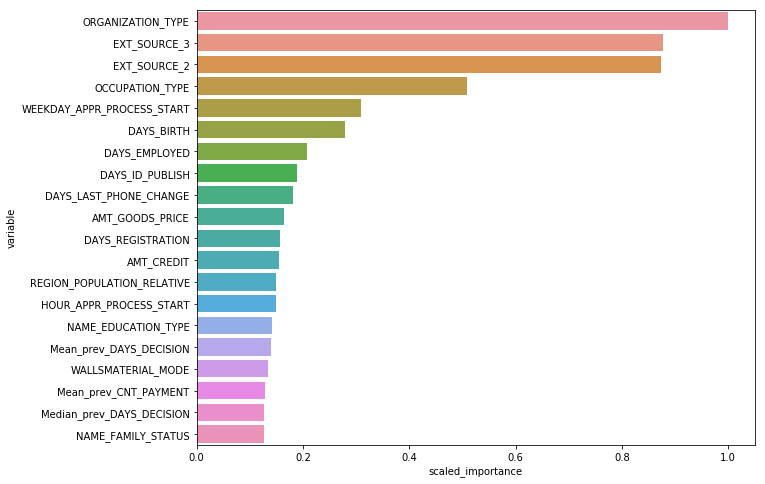

In [11]:
# Feature importance
importance = rf_model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance[:20])
plt.show()

In [12]:
importance

,variable,relative_importance,scaled_importance,percentage
0,ORGANIZATION_TYPE,4.797532e+06,1.000000e+00,8.075738e-02
1,EXT_SOURCE_3,4.211870e+06,8.779242e-01,7.089886e-02
2,EXT_SOURCE_2,4.189486e+06,8.732585e-01,7.052207e-02
3,OCCUPATION_TYPE,2.436158e+06,5.077941e-01,4.100812e-02
4,WEEKDAY_APPR_PROCESS_START,1.486338e+06,3.098131e-01,2.501969e-02
5,DAYS_BIRTH,1.337071e+06,2.786998e-01,2.250707e-02
6,DAYS_EMPLOYED,9.963431e+05,2.076782e-01,1.677155e-02
7,DAYS_ID_PUBLISH,9.063536e+05,1.889208e-01,1.525675e-02
8,DAYS_LAST_PHONE_CHANGE,8.669043e+05,1.806980e-01,1.459269e-02
9,AMT_GOODS_PRICE,7.866066e+05,1.639607e-01,1.324103e-02


In [13]:
# make prediction file
test_id = test['SK_ID_CURR'].values
test_pred = rf_test_pred

rf_csv = pd.DataFrame({'SK_ID_CURR': test_id, 'TARGET': test_pred}, 
                       columns=['SK_ID_CURR', 'TARGET'])
rf_csv.to_csv('./result/all_feature_h2o_random_forest_balanced.csv', index=False)

# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_9541 closed.
